In [1]:
import main as m
import numpy as np

In [2]:
def Lanczos(x, n):
	if x == 0:
		return 1
	elif abs(x) < n:
		return np.sinc(x) * np.sinc(x/n)
	return 0

In [3]:
def LanczosInterpolation(I, n, C:(int,int)):
	"""
	I : Image
	"""
	x, y = C
	# Calcul du poid
	w = 0
	P = 0
	for i in range(-n, n+1):
		for j in range(-n, n+1):
			w += Lanczos(i-x+np.floor(x), n)*Lanczos(j-y+np.floor(y), n)
			P += I[int(np.floor(x)+i), int(np.floor(y)+j)]*Lanczos(i-x+np.floor(x), n)*Lanczos(j-y+np.floor(y), n)
	return P/w

In [9]:
I = m.ImportAsPng("export/Rebuild.png")

In [10]:
x,y = I.shape
M = np.zeros((2*x, 2*y))
for i in range(x):
    for j in range(y):
        M[2*i, 2*j] = I[i,j]

In [38]:
for i in range(x-1):
    for j in range(y-1):
        if M[i,j] == 0:
            M[i,j] = LanczosInterpolation(I,2,(i/2,j/2))

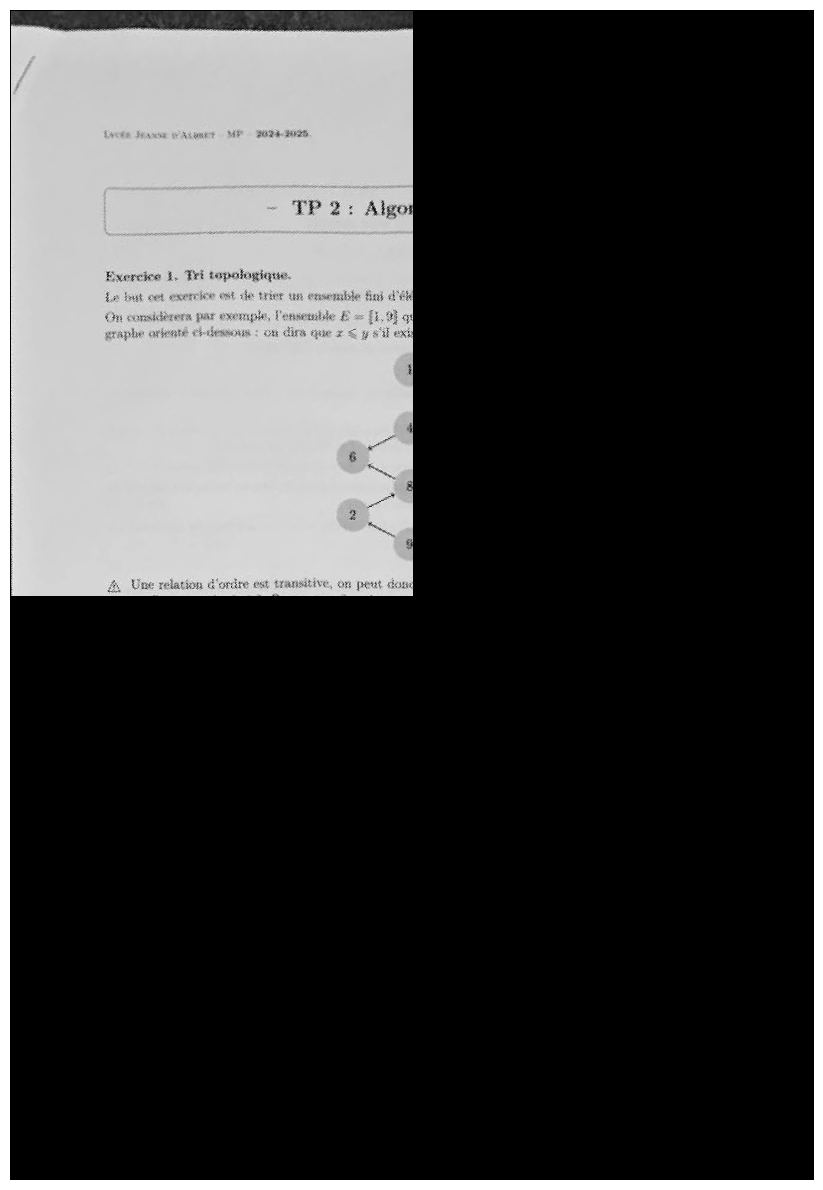

In [11]:
m.Afficher(M)